<a href="https://colab.research.google.com/github/GomathiRajendran/ML-Foundations/blob/main/Absenteeism_Analysis_colabcopy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Employee Absenteeism Analysis🏢

####**💡Data Explanation** 
1. ID - Identiﬁcation number of the employee 
2. Reason for absence -  The reason for absence (range from 1 - 28) 
<br>**Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:**
- I Certain infectious and parasitic diseases
-II Neoplasms
-III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
-IV Endocrine, nutritional and metabolic diseases
-V Mental and behavioural disorders
-VI Diseases of the nervous system
-VII Diseases of the eye and adnexa
-VIII Diseases of the ear and mastoid process
-IX Diseases of the circulatory system
-X Diseases of the respiratory system
-XI Diseases of the digestive system
-XII Diseases of the skin and subcutaneous tissue
-XIII Diseases of the musculoskeletal system and connective tissue
-XIV Diseases of the genitourinary system
-XV Pregnancy, childbirth and the puerperium
-XVI Certain conditions originating in the perinatal period
-XVII Congenital malformations, deformations and chromosomal abnormalities
-XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
-XIX Injury, poisoning and certain other consequences of external causes
-XX External causes of morbidity and mortality
-XXI Factors influencing health status and contact with health services.

And 7 categories without (CID)
- patient follow-up (22)
- medical consultation (23)
- blood donation (24)
- laboratory examination (25)
- unjustified absence (26)
- physiotherapy (27)
- dental consultation (28).
<br/>
<br/>
3. Date - Date of absence
4. Transportation Expense - Transportation cost from home to work
5. Distance to Work -  Distance from residence to work 
6. Age - Age of the employee in years 
7. Daily Work Load Average - Average workload per day 
8. Body Mass Index - BMI of the employee
9. Education - Range is from 1 - 4 depending on the education level
10. Children - Number of children of the employee 
11. Pets - Number of pets that the employee has 
12. Absenteeism Time in Hours 

In [1]:
#Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

In [2]:
# Reading the data
df = pd.read_excel('/content/drive/MyDrive/Attendance_Data.xlsx')

##📊 Exploratory Data Analysis

In [3]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2
3,7,7,2015-07-16,279,5,39,239.554,24,1,2,0,4
4,11,23,2015-07-23,289,36,33,239.554,30,1,2,1,2


In [4]:
df.shape

(699, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ID                         699 non-null    int64         
 1   Reason for Absence         699 non-null    int64         
 2   Date                       699 non-null    datetime64[ns]
 3   Transportation Expense     699 non-null    int64         
 4   Distance to Work           699 non-null    int64         
 5   Age                        699 non-null    int64         
 6   Daily Work Load Average    699 non-null    float64       
 7   Body Mass Index            699 non-null    int64         
 8   Education                  699 non-null    int64         
 9   Children                   699 non-null    int64         
 10  Pets                       699 non-null    int64         
 11  Absenteeism Time in Hours  699 non-null    int64         
dtypes: datet

In [6]:
# Checking the summary statistics
df.describe()

,ID,Reason for Absence,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,17.972818,19.406295,222.409156,29.862661,36.414878,271.896030,26.731044,1.283262,1.022890,0.688126,6.768240
std,11.021500,8.361171,66.340130,14.793459,6.383369,39.972638,4.254685,0.668482,1.112339,1.166640,12.677872
min,1.000000,0.000000,118.000000,5.000000,27.000000,205.917000,19.000000,1.000000,0.000000,0.000000,0.000000
25%,9.000000,13.000000,179.000000,16.000000,31.000000,242.931500,24.000000,1.000000,0.000000,0.000000,2.000000
50%,18.000000,23.000000,225.000000,26.000000,37.000000,264.249000,25.000000,1.000000,1.000000,0.000000,3.000000
75%,28.000000,27.000000,260.000000,50.000000,40.000000,294.217000,31.000000,1.000000,2.000000,1.000000,8.000000
max,36.000000,28.000000,388.000000,52.000000,58.000000,378.884000,38.000000,4.000000,4.000000,8.000000,120.000000


In [7]:
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

In [8]:
from datetime import datetime as dt
df['Month'] = df.Date.dt.month

In [9]:
df.head(3)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7


In [10]:
df['Day'] = df.Date.dt.day

In [11]:
df.head(3)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,7
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,14
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,15


In [12]:
df['Year'] = df.Date.dt.year

In [13]:
df.head(3)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day,Year
0,11,26,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,7,2015
1,36,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,14,2015
2,3,23,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,15,2015


In [14]:
for column in df.columns:
    print(f"Column: {column}")
    print(f"Number of unique values: {df[column].nunique()}")
    print(f"Min: {df[column].min()}")
    print(f"Max: {df[column].max()}")
    print('_________________________________________________')

Column: ID
Number of unique values: 34
Min: 1
Max: 36
_________________________________________________
Column: Reason for Absence
Number of unique values: 28
Min: 0
Max: 28
_________________________________________________
Column: Date
Number of unique values: 432
Min: 2015-07-06 00:00:00
Max: 2018-05-31 00:00:00
_________________________________________________
Column: Transportation Expense
Number of unique values: 24
Min: 118
Max: 388
_________________________________________________
Column: Distance to Work
Number of unique values: 24
Min: 5
Max: 52
_________________________________________________
Column: Age
Number of unique values: 21
Min: 27
Max: 58
_________________________________________________
Column: Daily Work Load Average
Number of unique values: 35
Min: 205.917
Max: 378.884
_________________________________________________
Column: Body Mass Index
Number of unique values: 16
Min: 19
Max: 38
_________________________________________________
Column: Education
Number of u

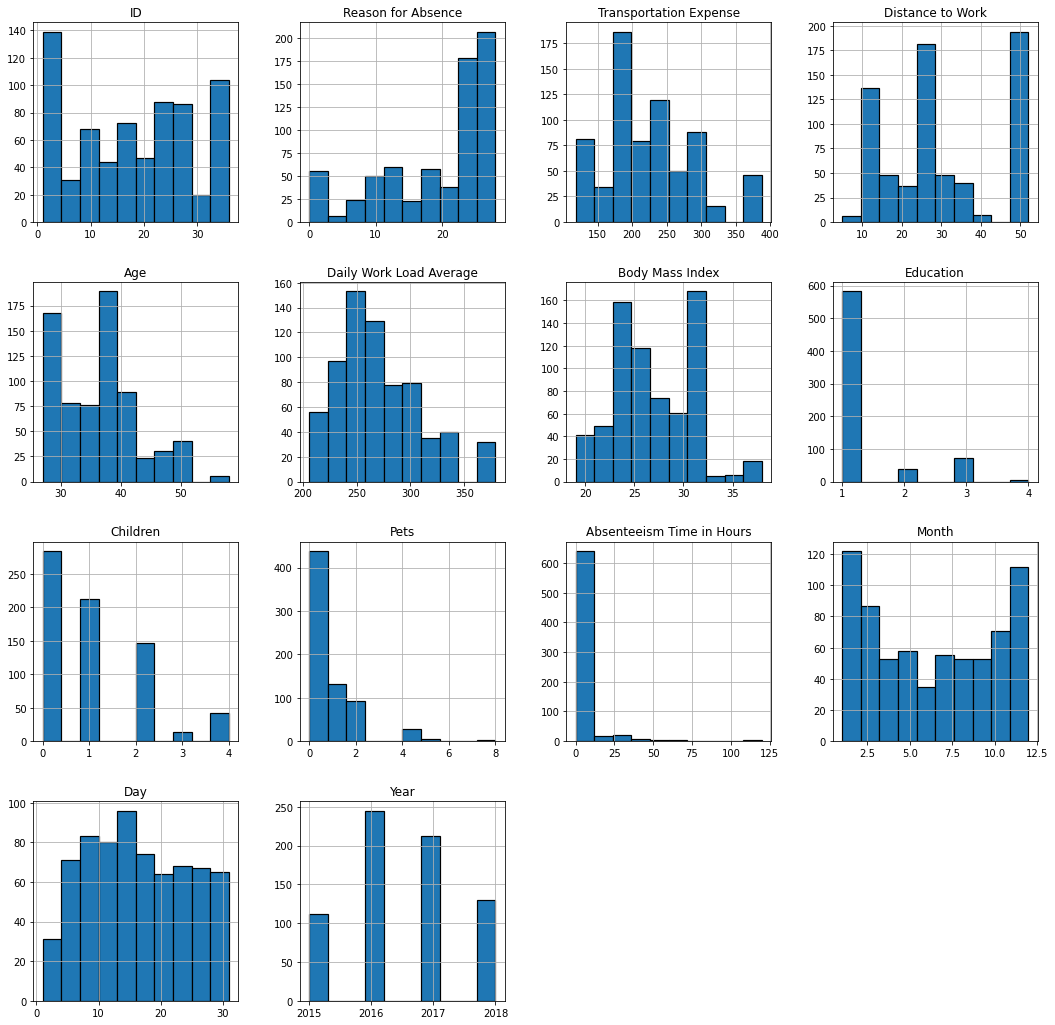

In [15]:
df.hist(edgecolor='black', linewidth=1.2, figsize=(18,18));

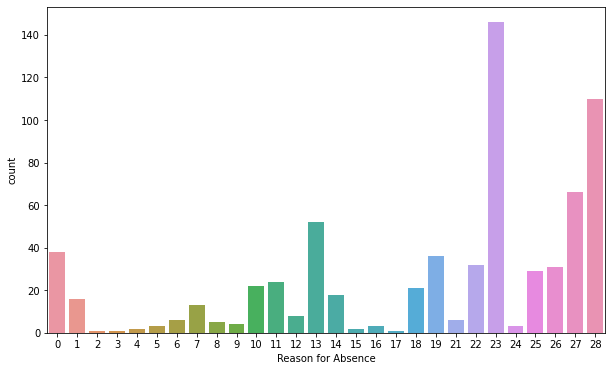

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Reason for Absence');

***Insight***:<br/> 
 23 i.e., **Medical consultation** is the reason quoted by most employees for their absence followed by 28 which is **Dental consultation**

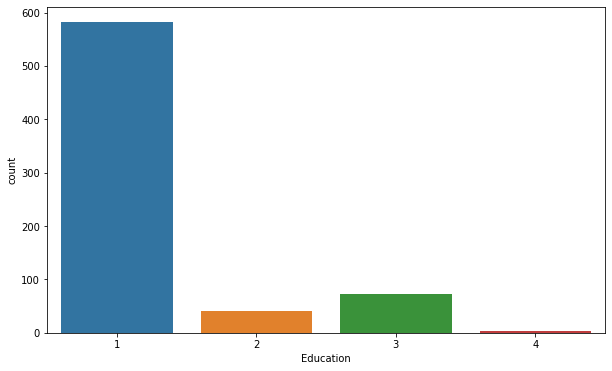

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Education');

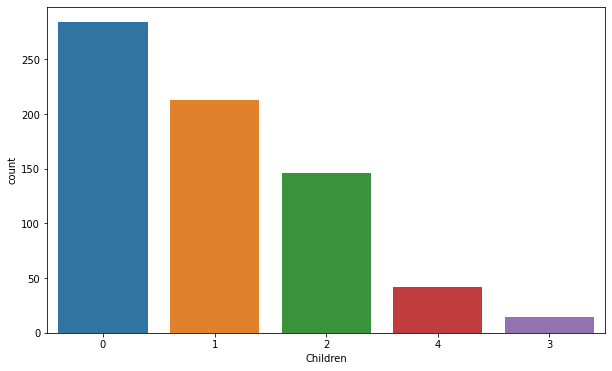

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Children', order=df.Children.value_counts().index);

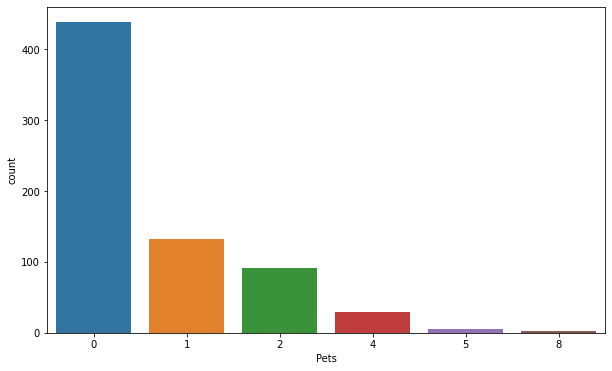

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Pets', order=df.Pets.value_counts().index);

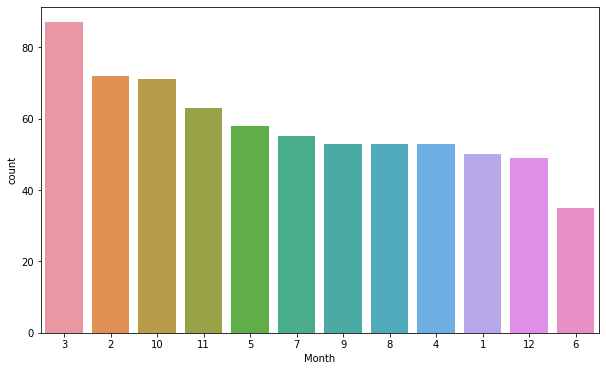

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Month', order=df.Month.value_counts().index);

**Insight**:<br/>
Employees mostly take leave on March month followed by February and October

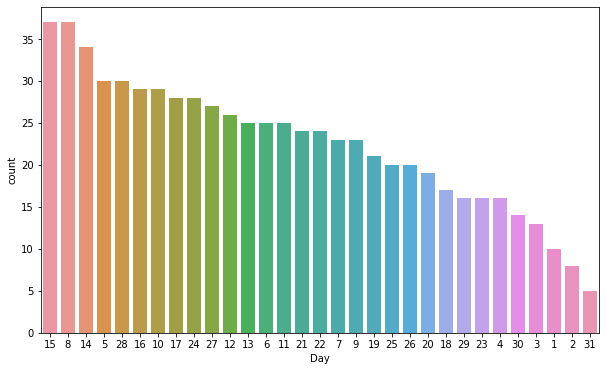

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Day', order=df.Day.value_counts().index);

Insight:<br/>
People prefer not to absent themselves on start and end of the month

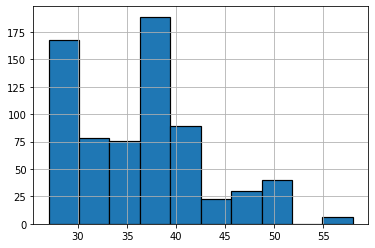

In [22]:
df['Age'].hist(edgecolor='black', linewidth=1.2, bins=10);

In [23]:
(max(df['Age']) - min(df['Age']))/5

6.2

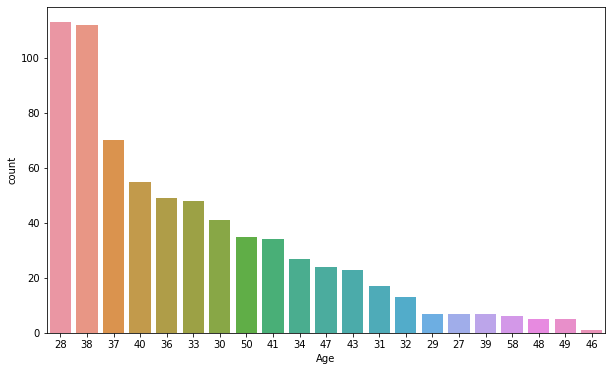

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Age', order=df.Age.value_counts().index);

Insight:<br/>
People beloging to age group of 35 to 40 takes more leaves

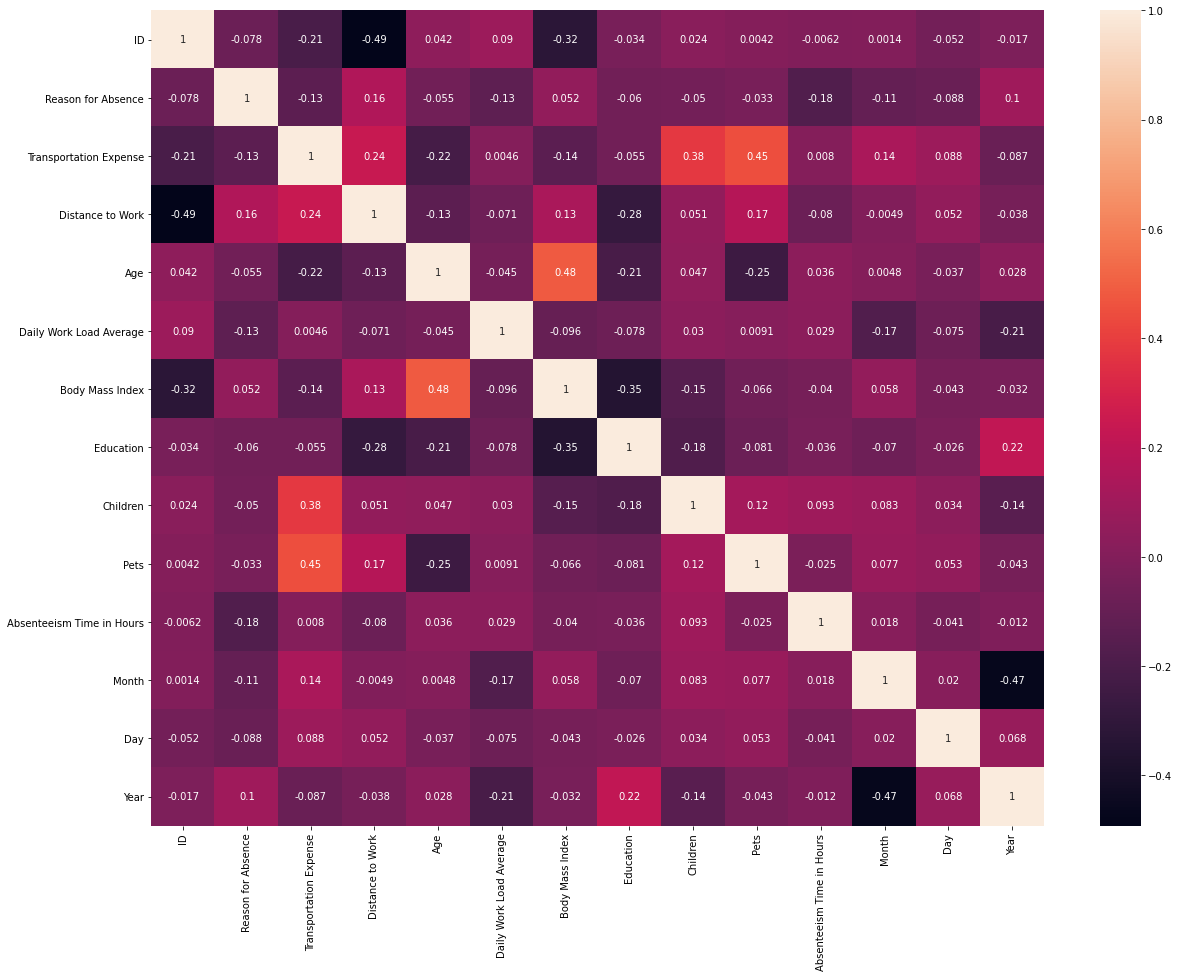

In [25]:
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True);

###**🤖 Using Machine Learning Algorithms**

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm, tree
import xgboost
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle

In [27]:
data = df.drop(['ID'], axis = 1)

In [28]:

### the grouping is as follows
'''
1- 14 are various diseases
15 -17 : pregnancy and given birth related
18-21: poisons or diseases not elsewere categorise
22 and above : light reason or less serious reasons

'''
### then apply the function below to the dataframe


def Reason(data):
    if data['Reason for Absence'] < 15 :
        d = 'R_Known'
    elif data['Reason for Absence'] >= 15 and data['Reason for Absence'] <= 17  :
        d = 'R_Preg_Birth'
    elif data['Reason for Absence'] >= 18 and data['Reason for Absence'] <= 21  :
        d = 'R_Pois_unclass'
    elif data['Reason for Absence'] == 22:
        d = 'R_NotSerious'
    else:
        d = 'R_NotSerious'
    return d

data['ReasonGroups'] = data.apply(Reason, axis=1)

# so lets drop the Reasons for absence column because is no more useful
data = data.drop(['Reason for Absence'], axis = 1)

In [29]:
data.head(3)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day,Year,ReasonGroups
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,7,2015,R_NotSerious
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,14,2015,R_Known
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,15,2015,R_NotSerious


In [30]:
#lets get dummies
R_dummies = pd.get_dummies(data['ReasonGroups'])

#lets merge it
data = pd.concat([data, R_dummies], axis = 1)

data = data.drop(['ReasonGroups'], axis = 1)
data.head(10)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month,Day,Year,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth
0,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,7,2015,0,1,0,0
1,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,14,2015,1,0,0,0
2,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,15,2015,0,1,0,0
3,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,16,2015,1,0,0,0
4,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,23,2015,0,1,0,0
5,2015-07-10,179,51,38,239.554,31,1,0,0,2,7,10,2015,0,1,0,0
6,2015-07-17,361,52,28,239.554,27,1,1,4,8,7,17,2015,0,1,0,0
7,2015-07-24,260,50,36,239.554,23,1,4,0,4,7,24,2015,0,1,0,0
8,2015-07-06,155,12,34,239.554,25,1,2,0,40,7,6,2015,0,0,1,0
9,2015-07-13,235,11,37,239.554,29,3,1,1,8,7,13,2015,0,1,0,0


In [31]:
data.isnull().sum()

Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
Month                        0
Day                          0
Year                         0
R_Known                      0
R_NotSerious                 0
R_Pois_unclass               0
R_Preg_Birth                 0
dtype: int64

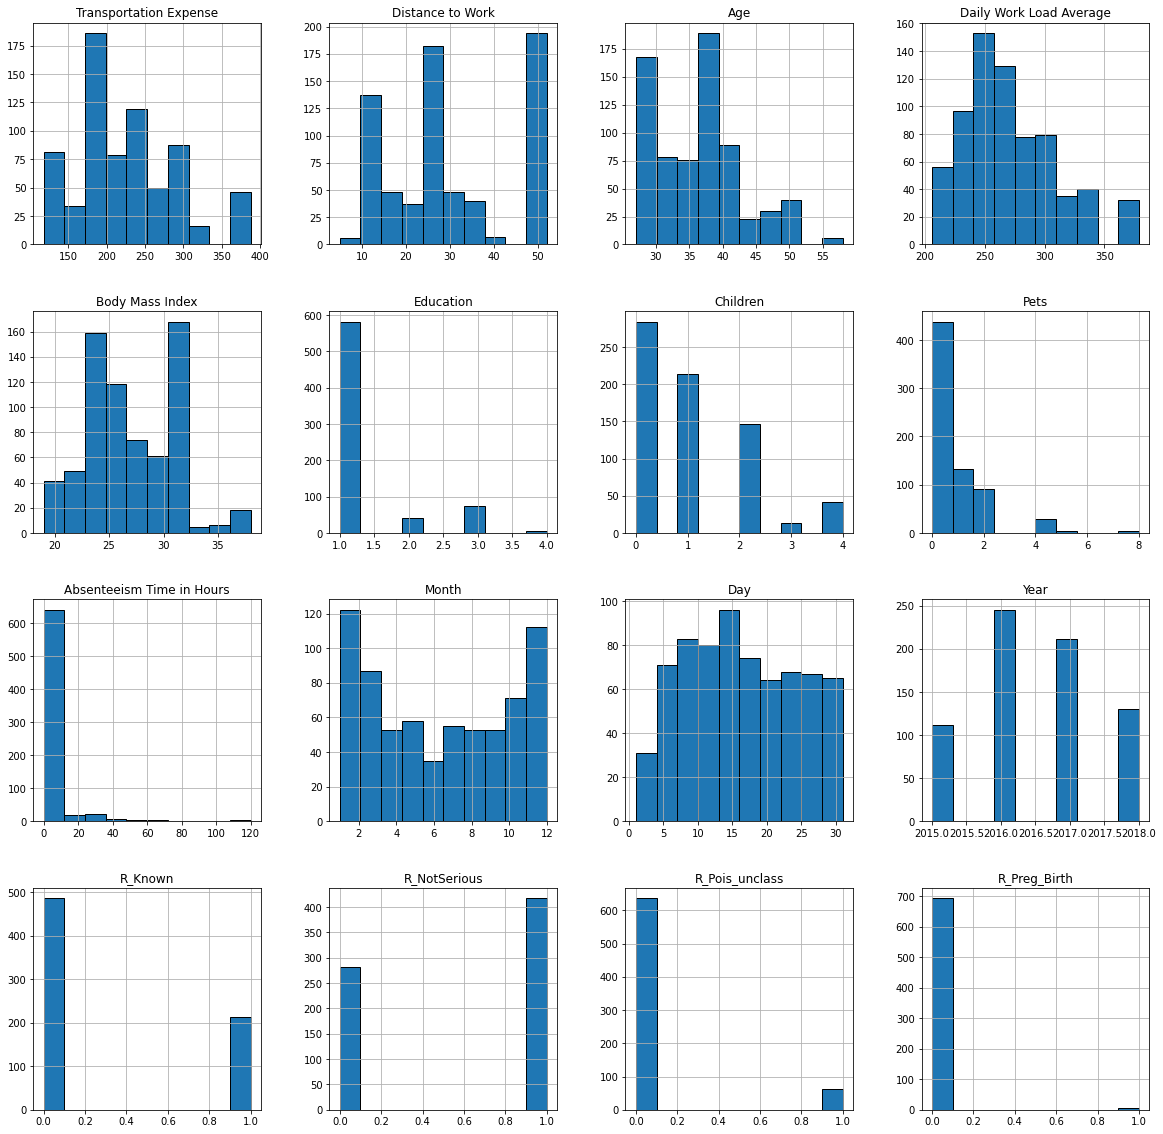

In [32]:
# Visulazing the distibution of the data for every feature
data.hist(linewidth=1, edgecolor='black', figsize=(20, 20));

In [33]:
targets = np.where(data['Absenteeism Time in Hours'] > data['Absenteeism Time in Hours'].median(),1,0)

In [34]:
# creating a Series in the original data frame that will contain the targets for the regression
data['Absenteeism'] = targets
#Droping the old absenteesim column
adata = data.drop(['Absenteeism Time in Hours','Date'], axis = 1)
adata = adata.reset_index(drop=True)

In [35]:
adata

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day,Year,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth,Absenteeism
0,289,36,33,239.554,30,1,2,1,7,7,2015,0,1,0,0,1
1,118,13,50,239.554,31,1,1,0,7,14,2015,1,0,0,0,0
2,179,51,38,239.554,31,1,0,0,7,15,2015,0,1,0,0,0
3,279,5,39,239.554,24,1,2,0,7,16,2015,1,0,0,0,1
4,289,36,33,239.554,30,1,2,1,7,23,2015,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,179,22,40,237.656,22,2,2,0,5,23,2018,1,0,0,0,1
695,225,26,28,237.656,24,1,1,2,5,23,2018,1,0,0,0,0
696,330,16,28,237.656,25,2,0,0,5,24,2018,1,0,0,0,1
697,235,16,32,237.656,25,3,0,0,5,24,2018,0,1,0,0,0


In [36]:
unscaled_inputs = adata.iloc[:,:-1]
targets = adata['Absenteeism']

####Standardise data

In [37]:
absenteeism_scaler = StandardScaler()

In [38]:

class CustomScaler(BaseEstimator,TransformerMixin): 
    
    # init or what information we need to declare a CustomScaler object
    # and what is calculated/declared as we do
    
    def __init__(self,columns,copy=True,with_mean=True,with_std=True):
        
        # scaler is nothing but a Standard Scaler object
        self.scaler = StandardScaler(copy,with_mean,with_std)
        # with some columns 'twist'
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    
    # the fit method, which, again based on StandardScale
    
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    # the transform method which does the actual scaling

    def transform(self, X, y=None, copy=None):
        
        # record the initial order of the columns
        init_col_order = X.columns
        
        # scale all features that you chose when creating the instance of the class
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        
        # declare a variable containing all information that was not scaled
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        
        # return a data frame which contains all scaled features and all 'not scaled' features
        # use the original order (that you recorded in the beginning)
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [39]:
columns_to_omit = ['R_Known', 'R_NotSerious', 'R_Pois_unclass', 'R_Preg_Birth','Education']

In [40]:
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [41]:
# declare a scaler object, specifying the columns you want to scale
absenteeism_scaler = CustomScaler(columns_to_scale)
# fit the data (calculate mean and standard deviation); they are automatically stored inside the object 
absenteeism_scaler.fit(unscaled_inputs)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


CustomScaler(columns=['Transportation Expense', 'Distance to Work', 'Age',
                      'Daily Work Load Average', 'Body Mass Index', 'Children',
                      'Pets', 'Month', 'Day', 'Year'],
             copy=None, with_mean=None, with_std=None)

In [42]:
scaled_inputs = absenteeism_scaler.transform(unscaled_inputs)

In [43]:
scaled_inputs

,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month,Day,Year,R_Known,R_NotSerious,R_Pois_unclass,R_Preg_Birth
0,1.004498,0.415165,-0.535348,-0.809684,0.768869,1,0.879058,0.267518,0.183294,-1.101984,-1.560806,0,1,0,0
1,-1.574973,-1.140689,2.129730,-0.809684,1.004073,1,-0.020593,-0.590258,0.183294,-0.226374,-1.560806,1,0,0,0
2,-0.654811,1.429853,0.248498,-0.809684,1.004073,1,-0.920243,-0.590258,0.183294,-0.101287,-1.560806,0,1,0,0
3,0.853652,-1.681856,0.405268,-0.809684,-0.642351,1,0.879058,-0.590258,0.183294,0.023801,-1.560806,1,0,0,0
4,1.004498,0.415165,-0.535348,-0.809684,0.768869,1,0.879058,0.267518,0.183294,0.899411,-1.560806,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,-0.654811,-0.531876,0.562037,-0.857200,-1.112757,2,0.879058,-0.590258,-0.387407,0.899411,1.529856,1,0,0,0
695,0.039082,-0.261293,-1.319194,-0.857200,-0.642351,1,-0.020593,1.125295,-0.387407,0.899411,1.529856,1,0,0,0
696,1.622968,-0.937751,-1.319194,-0.857200,-0.407147,2,-0.920243,-0.590258,-0.387407,1.024498,1.529856,1,0,0,0
697,0.189928,-0.937751,-0.692117,-0.857200,-0.407147,3,-0.920243,-0.590258,-0.387407,1.024498,1.529856,0,1,0,0


In [44]:
# splitting data for training and testing
train_test_split(scaled_inputs, targets)

x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, targets,  test_size = 0.3, random_state = 17)
# check the shape of the train inputs and targets
print (x_train.shape, y_train.shape)

(489, 15) (489,)


In [45]:
print (x_test.shape, y_test.shape)

(210, 15) (210,)


In [46]:
#Now, we will create an array of Classifiers and append different classification models to our array
classifiers = [] 

mod1 = xgboost.XGBClassifier()
classifiers.append(mod1)
mod2 = svm.SVC()
classifiers.append(mod2)
mod3 = RandomForestClassifier()
classifiers.append(mod3)
mod4 = LogisticRegression()
classifiers.append(mod4)
mod5 = KNeighborsClassifier(3)
classifiers.append(mod5)
mod6 = AdaBoostClassifier()
classifiers.append(mod6)
mod7= GaussianNB()
classifiers.append(mod7)

In [47]:
#Lets fit the models into anarray

for clf in classifiers:
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    y_tr = clf.predict(x_train)
    acc_tr = accuracy_score(y_train, y_tr)
    acc = accuracy_score(y_test, y_pred)
    mn = type(clf).__name__
    
    print(clf)
    print(f"Accuracy of trainset {mn} is {acc_tr}")
    print(f"Accuracy of testset {mn} is {acc}")
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix of testset {mn} is {cm}")
    print('____________________________________________________________________________________')


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
Accuracy of trainset XGBClassifier is 0.8425357873210634
Accuracy of testset XGBClassifier is 0.7047619047619048
Confusion Matrix of testset XGBClassifier is [[92 30]
 [32 56]]
____________________________________________________________________________________
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
Accuracy of trains

**Here the ensemble method works good. RandomForestClassifier works well in this case**



In [48]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [49]:
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [52]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [53]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 110,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1800}

In [55]:
rf_random.best_score_

0.752556237218814

In [56]:
# save the model file
with open('bestRFC', 'wb') as file:
    pickle.dump(rf_random, file)

### By using the RandomizedSearechCV and Cross-validation, we have tuned the hyperparameters and increased the accuracy from 0.728 to 0.752

In [57]:
param = [{'C': [1, 10, 20], 'gamma': ['scale', 'auto'], 'kernel': ['rbf','linear']}]

# Create a classifier object with the classifier and parameter candidates
svcclf = GridSearchCV(estimator=svm.SVC(), param_grid=param)

# Train the classifier on data1's feature and target data
svcclf.fit(x_train, y_train)  

# View the accuracy score
print('Best score using SVC:', svcclf.best_score_) 


# View the best parameters for the model found using grid search
print('Best C:',svcclf.best_estimator_.C) 
print('Best Kernel:',svcclf.best_estimator_.kernel)
print('Best Gamma:',svcclf.best_estimator_.gamma)

Best score using SVC: 0.75665895224069
Best C: 1
Best Kernel: rbf
Best Gamma: scale


###Here we have used GridSearchCV with SVC model and the accuracy score is increased from 0.704 to 0.756

In [58]:
# save the model file
with open('bestSVC', 'wb') as file:
    pickle.dump(svcclf, file)

In [59]:
#Creating a grid of hyperparameters
boost = AdaBoostClassifier(base_estimator=None)
parameters = {'n_estimators': (50,100,150,200),
              'learning_rate': (0.1,0.5,1, 2)}
adab = GridSearchCV(boost, parameters)
adab.fit(x_train, y_train)
score = adab.best_score_
param = adab.best_params_
print(score)
print(param)

0.719966337050284
{'learning_rate': 0.1, 'n_estimators': 100}


###Here we have used GridSearchCV with AdaBoostClassifier model and the accuracy score is increased from 0.68 to 0.71

In [61]:
# save the model file
with open('bestAdaBoost', 'wb') as file:
    pickle.dump(adab, file)

## From these analysis, we can conclude that SupportVectorClassifier can be used to predict the absenteeism as it showed better performance than other models

--------------------------------------------------------------------------------------------------------------------                                                        END -------------------------------------------------------------------------------------------------------





